In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.11.0'

In [1]:
from tensorflow.python.client import device_lib

In [2]:
device_lib.list_local_devices()

Metal device set to: Apple M2 Pro


2023-12-10 15:06:42.809973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 15:06:42.810130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8068662206918961103
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 16922474471438216767
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

In [3]:
import torch

In [4]:
print(torch.cuda.is_available()) ## 요거는 안쓰이나벼 


False


In [5]:
print(torch.backends.mps.is_available())

True


In [9]:
!pip install tqdm

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [10]:
print(torch.__version__)

2.0.0


In [6]:
print(torch.backends.mps.is_built())

True


In [7]:
print(torch.backends.mps.is_available())

True


In [8]:
device = torch.device('mps')
#device = torch.device('cpu')

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [15]:
batch_size = 500

In [16]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                       download = True, transform = transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size = batch_size, 
                                         shuffle = True, num_workers = 2)

Files already downloaded and verified


In [17]:
testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                     download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                        shuffle = False, num_workers = 2)

Files already downloaded and verified


In [18]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')

In [19]:
def imshow(img):
    img = img/2+0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [20]:
## get some random training images 
images, labels = next(iter(trainloader))

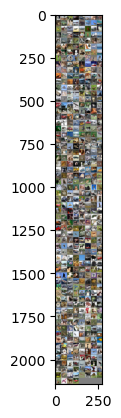

In [21]:
imshow(torchvision.utils.make_grid(images))

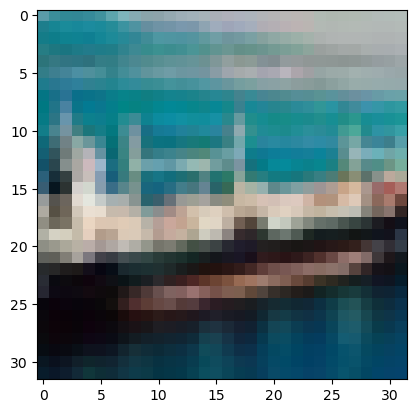

ship


In [28]:
imshow(images[15])
print(classes[labels[15]])

In [26]:
## print labels 
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

horse plane frog  cat   car   ship  horse deer  deer  frog  cat   ship  deer  plane deer  ship  bird  horse plane plane plane frog  truck cat   cat   bird  bird  car   frog  deer  truck ship  cat   ship  cat   frog  car   cat   deer  truck horse horse deer  dog   horse cat   plane ship  cat   bird  truck dog   cat   horse deer  ship  horse deer  cat   bird  frog  cat   bird  dog   cat   deer  car   frog  deer  plane ship  dog   plane cat   ship  dog   car   truck frog  bird  deer  truck ship  truck horse horse car   bird  ship  deer  ship  deer  car   car   dog   cat   frog  plane car   deer  frog  frog  bird  frog  frog  cat   ship  ship  horse car   frog  ship  truck plane ship  plane frog  car   cat   car   car   ship  truck plane truck deer  frog  ship  cat   horse cat   horse dog   car   cat   frog  cat   car   cat   car   plane frog  deer  frog  truck plane deer  plane ship  truck ship  cat   frog  car   car   plane plane dog   bird  frog  car   dog   deer  ship  bird  bird  deer

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) ## flatten all dimension except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
net = Net()
net = net.to(device)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [27]:
for epo in range(20): #loop over the dataset multiple times
    running_loss = 0.0
    i = 0
    for data in tqdm(trainloader):
        #get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimze
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        i += 1 
        running_loss += loss.item()
    
    print(f'[{epo + 1}, {i + 1:5d}] loss: {running_loss/12500:.3f}')

print('Finished Training')

100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


[1,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


[2,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


[3,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


[4,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


[5,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


[6,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


[7,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


[8,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


[9,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


[10,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


[11,   101] loss: 0.018


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


[12,   101] loss: 0.017


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


[13,   101] loss: 0.017


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


[14,   101] loss: 0.017


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


[15,   101] loss: 0.017


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


[16,   101] loss: 0.017


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


[17,   101] loss: 0.016


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


[18,   101] loss: 0.016


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


[19,   101] loss: 0.016


100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]

[20,   101] loss: 0.016
Finished Training


In [1]:
print('aaa \a')

aaa 
